# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city # YOUR CODE HERE
    api_key = weather_api_key
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Log the url, record, and set numbers
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data # YOUR CODE HERE
        response = requests.get(city_url)
        response_json = response.json()
        
        
        city_weather = response_json['weather'][0]['main']
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json['coord']['lat'] 
        city_lng = response_json['coord']['lon'] 
        city_max_temp = response_json['main']['temp_max'] 
        city_humidity = response_json['main']['humidity'] 
        city_clouds = response_json['clouds']['all'] 
        city_wind = response_json['wind']['speed'] 
        city_country = response_json['sys']['country'] 
        city_date = response_json['dt'] 
        city_name = response_json['name']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | vadso
Processing Record 3 of Set 1 | selfoss
Processing Record 4 of Set 1 | sabang
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | kapa'a
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | fonadhoo
City not found. Skipping...
Processing Record 12 of Set 1 | afaahiti
Processing Record 13 of Set 1 | san jose village
City not found. Skipping...
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | tudela de duero
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | dudinka
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | iola
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | tiksi
Processing Record 2

City not found. Skipping...
Processing Record 39 of Set 4 | queenstown
Processing Record 40 of Set 4 | akrehamn
Processing Record 41 of Set 4 | strezhevoy
Processing Record 42 of Set 4 | lihue
Processing Record 43 of Set 4 | mokokchung
Processing Record 44 of Set 4 | sao gabriel da cachoeira
Processing Record 45 of Set 4 | touros
Processing Record 46 of Set 4 | badger
Processing Record 47 of Set 4 | thinadhoo
Processing Record 48 of Set 4 | vila do maio
Processing Record 49 of Set 4 | saint-francois
Processing Record 0 of Set 5 | callao
Processing Record 1 of Set 5 | toliara
Processing Record 2 of Set 5 | cuito
Processing Record 3 of Set 5 | kailua-kona
Processing Record 4 of Set 5 | mount gambier
Processing Record 5 of Set 5 | bodo
Processing Record 6 of Set 5 | nar'yan-mar
Processing Record 7 of Set 5 | avarua
Processing Record 8 of Set 5 | hotan
Processing Record 9 of Set 5 | hinton
Processing Record 10 of Set 5 | happy valley-goose bay
Processing Record 11 of Set 5 | geraldton
Proc

Processing Record 28 of Set 8 | salisbury
Processing Record 29 of Set 8 | cabo san lucas
Processing Record 30 of Set 8 | baukau
Processing Record 31 of Set 8 | tezpur
Processing Record 32 of Set 8 | pimentel
Processing Record 33 of Set 8 | narnaund
Processing Record 34 of Set 8 | mejit
Processing Record 35 of Set 8 | camana
Processing Record 36 of Set 8 | mugia
Processing Record 37 of Set 8 | sillanwali
Processing Record 38 of Set 8 | fangshan
Processing Record 39 of Set 8 | sitka
Processing Record 40 of Set 8 | rio grande
Processing Record 41 of Set 8 | chifeng
Processing Record 42 of Set 8 | pozo alcon
Processing Record 43 of Set 8 | kawthoung
City not found. Skipping...
Processing Record 44 of Set 8 | san luis de la loma
Processing Record 45 of Set 8 | fereydun kenar
Processing Record 46 of Set 8 | tezu
Processing Record 47 of Set 8 | phon charoen
Processing Record 48 of Set 8 | emerald
Processing Record 49 of Set 8 | prince rupert
Processing Record 0 of Set 9 | chernomorskoye
Proce

Processing Record 17 of Set 12 | betio village
Processing Record 18 of Set 12 | naze
Processing Record 19 of Set 12 | shenjiamen
Processing Record 20 of Set 12 | ust'-uda
Processing Record 21 of Set 12 | agogo
Processing Record 22 of Set 12 | diamantino
Processing Record 23 of Set 12 | greymouth
Processing Record 24 of Set 12 | aktobe
Processing Record 25 of Set 12 | pasni
Processing Record 26 of Set 12 | praia da vitoria
Processing Record 27 of Set 12 | kankan
Processing Record 28 of Set 12 | khovd
Processing Record 29 of Set 12 | aliveri
Processing Record 30 of Set 12 | lupane
Processing Record 31 of Set 12 | kumeny
Processing Record 32 of Set 12 | guane
Processing Record 33 of Set 12 | salekhard
Processing Record 34 of Set 12 | schweizer-reneke
Processing Record 35 of Set 12 | champerico
Processing Record 36 of Set 12 | ivdel'
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data = pd.DataFrame(city_data)

# Show Record Count
city_data.count()


City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data = pd.DataFrame(city_data)

city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,299.57,96,44,3.13,EC,1683862477
1,vadso,70.0744,29.7487,279.64,100,75,5.66,NO,1683862635
2,selfoss,63.9331,-20.9971,282.06,97,100,9.24,IS,1683862734
3,sabang,5.8933,95.3214,301.98,74,97,1.66,ID,1683862734
4,bredasdorp,-34.5322,20.0403,284.59,79,89,5.43,ZA,1683862627


In [6]:
# Export the City_Data into a csv
city_data.to_csv("./cities.csv")

In [7]:
# Read saved data
city_data = pd.read_csv("./cities.csv")

# Display sample data
city_data.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,puerto ayora,-0.7393,-90.3518,299.57,96,44,3.13,EC,1683862477
1,1,vadso,70.0744,29.7487,279.64,100,75,5.66,NO,1683862635
2,2,selfoss,63.9331,-20.9971,282.06,97,100,9.24,IS,1683862734
3,3,sabang,5.8933,95.3214,301.98,74,97,1.66,ID,1683862734
4,4,bredasdorp,-34.5322,20.0403,284.59,79,89,5.43,ZA,1683862627


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

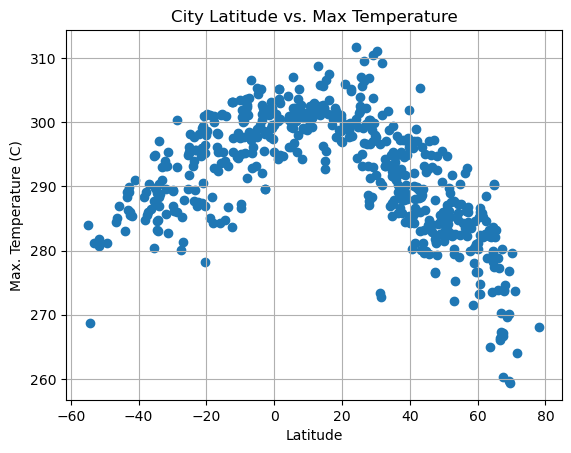

In [8]:
# Build scatter plot for latitude vs. temperature
lat_values = city_data['Lat']
temp_values = city_data['Max Temp']
    
# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (C)')
plt.grid(True)

plt.scatter(lat_values, temp_values)

# Save the figure
plt.savefig("./Fig1.png")



# Show plot
plt.show()

#### Latitude Vs. Humidity

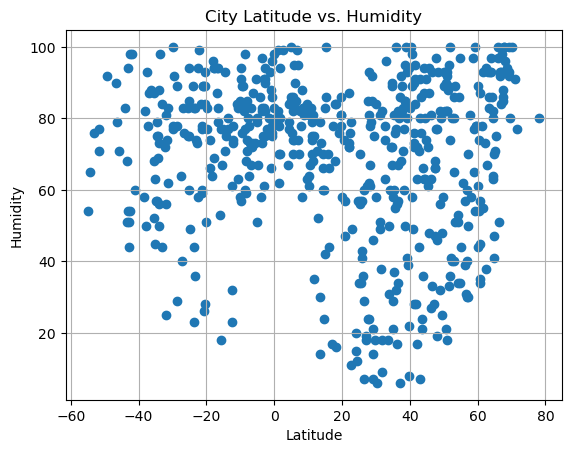

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_values = city_data['Lat']
hum_values = city_data['Humidity']

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

plt.scatter(lat_values, hum_values)

# Save the figure
plt.savefig("./Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

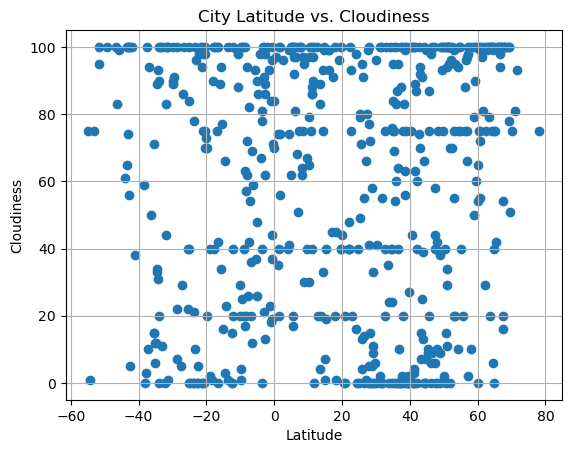

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_values = city_data['Lat']
clo_values = city_data['Cloudiness']

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

plt.scatter(lat_values, clo_values)
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

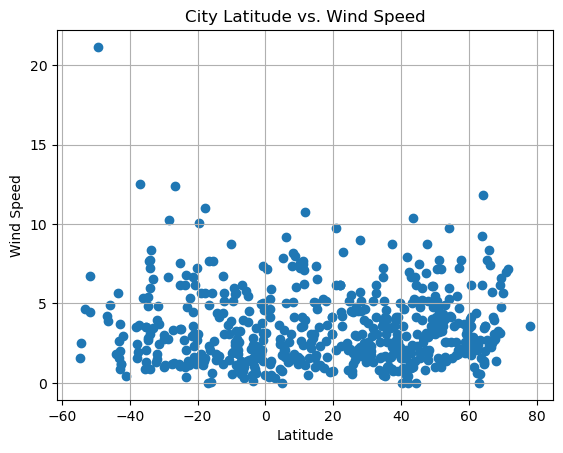

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_values = city_data['Lat']
win_values = city_data['Wind Speed']

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

plt.scatter(lat_values, win_values)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data[city_data['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,vadso,70.0744,29.7487,279.64,100,75,5.66,NO,1683862635
2,2,selfoss,63.9331,-20.9971,282.06,97,100,9.24,IS,1683862734
3,3,sabang,5.8933,95.3214,301.98,74,97,1.66,ID,1683862734
6,6,kapa'a,22.0752,-159.3190,299.33,72,40,6.17,US,1683862735
11,11,aasiaat,68.7098,-52.8699,269.58,94,100,3.24,GL,1683862627


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data[city_data['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,puerto ayora,-0.7393,-90.3518,299.57,96,44,3.13,EC,1683862477
4,4,bredasdorp,-34.5322,20.0403,284.59,79,89,5.43,ZA,1683862627
5,5,adamstown,-25.0660,-130.1015,295.43,60,100,7.56,PN,1683862616
7,7,papatowai,-46.5619,169.4708,284.39,90,100,4.24,NZ,1683862616
8,8,punta arenas,-53.1500,-70.9167,281.21,76,75,4.63,CL,1683862736


###  Temperature vs. Latitude Linear Regression Plot

'The r-value is: -0.8161183835910346'

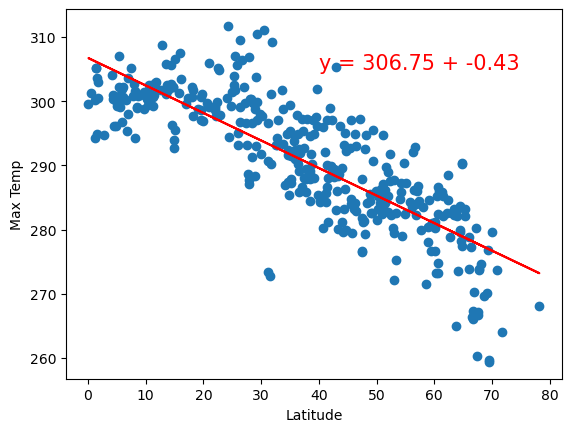

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# I copied this line of code from Bootcamp class
y_predict = intercept + (slope * x_values)

# I copied this line of code from Bootcamp class
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}'

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color='r')
plt.annotate(line_eq, (40,305), color='r', fontsize=15)
f'The r-value is: {rvalue}'

'The r-value is: 0.7133643902336237'

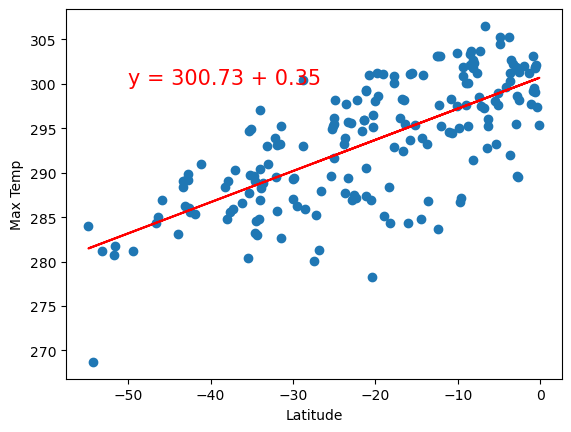

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}'
y_predict = intercept + (slope * x_values)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color='r')
plt.annotate(line_eq, (-50,300), color='r', fontsize=15)
f'The r-value is: {rvalue}'


**Discussion about the linear relationship:** 
There is a pretty strong relationship between the latitude and maximum temperature. The cities with a lower latitude  are closer to the equator and have a higher temperaure. As the latitude increases in distance away from equator the temperature decreases.


### Humidity vs. Latitude Linear Regression Plot

'The r-value is: 0.04045300315376321'

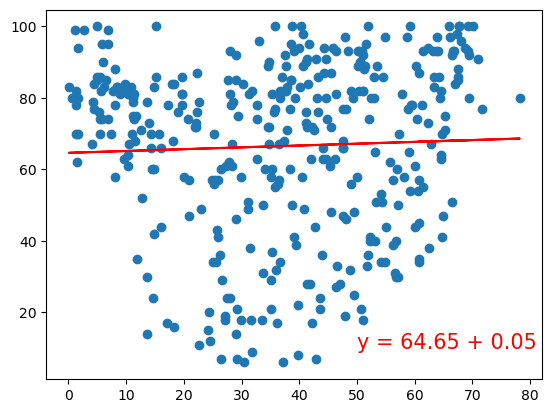

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}'
y_predict = intercept + (slope * x_values)

plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color='r')
plt.annotate(line_eq, (50,10), color='r', fontsize=15)
f'The r-value is: {rvalue}'

'The r-value is: 0.17054145415110458'

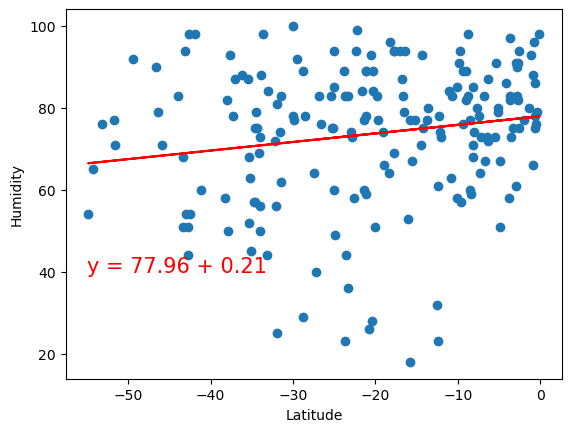

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}'
y_predict = intercept + (slope * x_values)

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color = 'r')
plt.annotate(line_eq, (-55,40), color ='r', fontsize=15)
f'The r-value is: {rvalue}'

**Discussion about the linear relationship:** 
With the rvalue being rather far from 1 in both the northern and southern hemispheres, the relationship between humidity and latitude is not strong. 

### Cloudiness vs. Latitude Linear Regression Plot

'The r-value is: 0.06010270283327241'

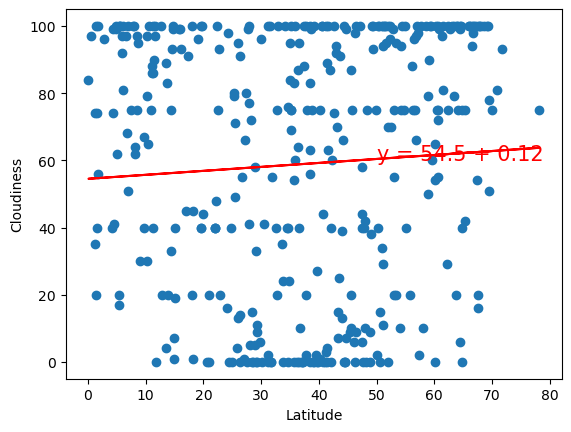

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}'
y_predict = intercept + (slope * x_values)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color = 'r')
plt.annotate(line_eq, (50, 60), color = 'r', fontsize = 15)
f'The r-value is: {rvalue}'

'The r-value is: -0.039509928907198996'

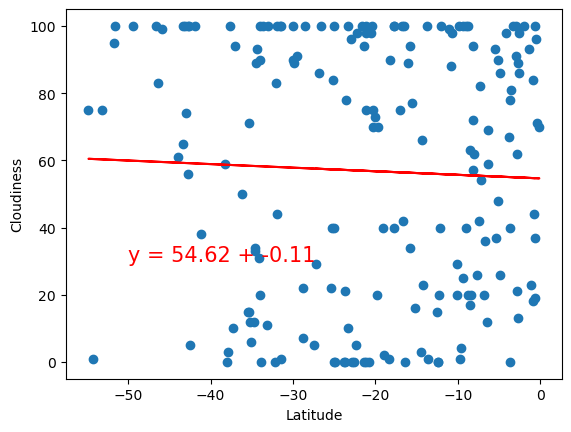

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}'
y_predict = intercept + (slope * x_values)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color = 'r')
plt.annotate(line_eq, (-50,30), color = 'r', fontsize = 15)
f'The r-value is: {rvalue}'

**Discussion about the linear relationship:** Similar to the humidity and latitude relationship, cloudiness proves to also have a weak connection with latitude.

### Wind Speed vs. Latitude Linear Regression Plot

'The r-value is: 0.04224905461865819'

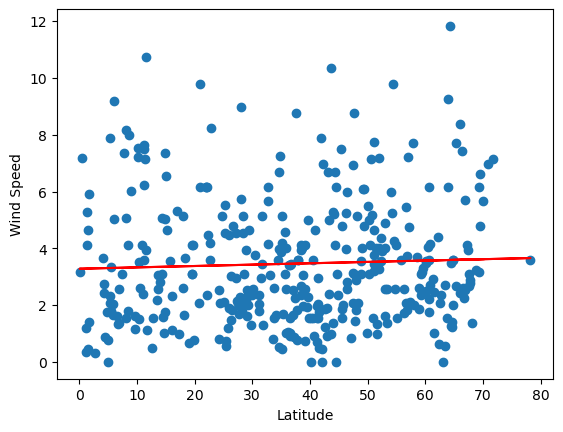

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}'
y_predict = intercept + (slope * x_values)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color = 'r')
plt.annotate(line_eq, (5,13), color = 'r', fontsize = 15)
f'The r-value is: {rvalue}'


'The r-value is: -0.1799853093068256'

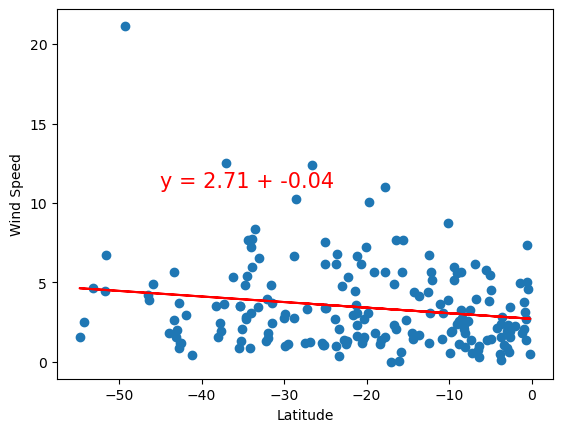

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = f'y = {round(intercept,2)} + {round(slope,2)}'
y_predict = intercept + (slope * x_values)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.scatter(x_values, y_values)
plt.plot(x_values, y_predict, color = 'r')
plt.annotate(line_eq, (-45,11), color = 'r', fontsize = 15)
f'The r-value is: {rvalue}'


**Discussion about the linear relationship:** Again, with the distance between 1 and the rvalue being far, the connection between windspeed and latitude is rather small. There is a larger connection in the southern hemisphere, compared to the north, however it is insignificant in conluding any reliable impact.